In [ ]:
- Título e nome dos integrantes;
- Introdução: motivação e objetivos da análise;
- Dados usados: descrição do(s) dataset(s) e exploração inicial dos dados;
- Pré-processamento: limpeza e transformação dos dados necessários, explicando as decisões tomadas;
- Perguntas: mostrar cada pergunta e executar o passo a passo para respondê-las (vocês devem utilizar regressão linear ou agrupamento em pelo menos uma pergunta);
- Conclusão: resumir os resultados encontrados e explicar por que são importantes. Apontar limitações, trabalhos futuros e melhorias que podem ser feitas.

## Prostate Cancer Recurrence Analysis
### Elayni Enoly S. Franco

#### Introduction
In this notebook, I explore and analyze the dataset "Blood Storage" from Cleveland Clinic Lerner Research Institute (http://www.lerner.ccf.org/qhs/datasets/).

### Dataset Description

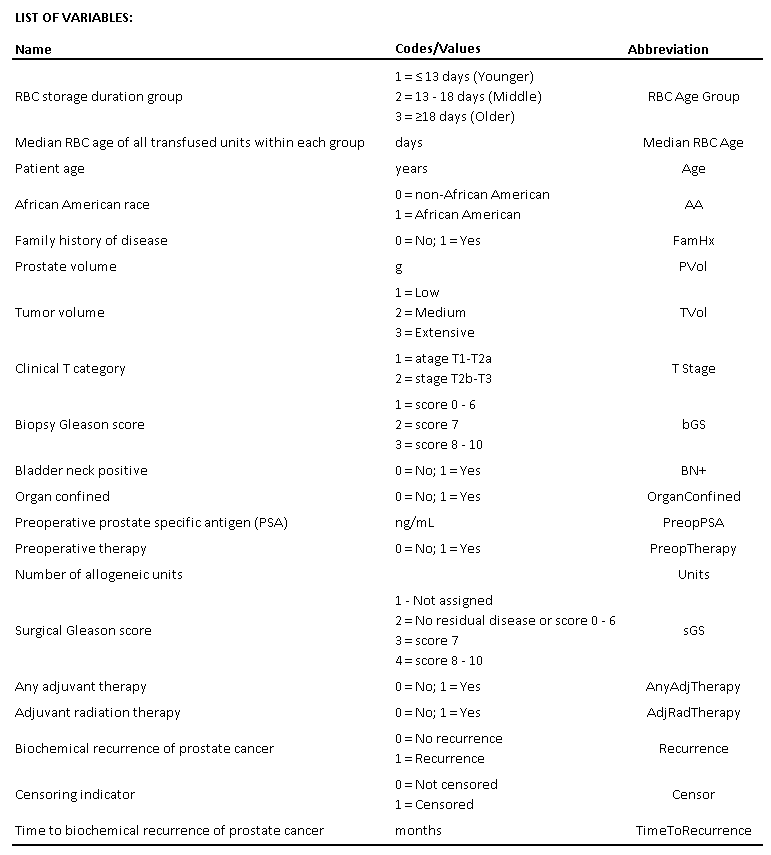


### Initial Exploration



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set pastel color for plots
sns.set(style="ticks", palette="pastel")

# import dataset and view first datas
df = pd.read_csv("https://raw.githubusercontent.com/elayni/prostate-cancer-recurrence-analysis/main/Dataset/BloodStorage.csv", error_bad_lines=False)

df.head()

,RBC Age Group,Median RBC Age,Age,AA,FamHx,PVol,TVol,T Stage,bGS,BN+,OrganConfined,PreopPSA,PreopTherapy,Units,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor,TimeToRecurrence
0,3,25,72.1,0,0,54.0,3.0,1.0,3.0,0,0,14.08,1,6,1,0,0,1,0,2.67
1,3,25,73.6,0,0,43.2,3.0,2.0,2.0,0,1,10.50,0,2,3,0,0,1,0,47.63
2,3,25,67.5,0,0,102.7,1.0,1.0,3.0,0,1,6.98,1,1,1,0,0,0,1,14.10
3,2,15,65.8,0,0,46.0,1.0,1.0,1.0,0,1,4.40,0,2,3,0,0,0,1,59.47
4,2,15,63.2,0,0,60.0,2.0,1.0,2.0,0,1,21.40,0,3,3,0,0,0,1,1.23


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 315
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               297 non-null    float64
 1   AA                297 non-null    int64  
 2   FamHx             297 non-null    int64  
 3   PVol              297 non-null    float64
 4   TVol              297 non-null    float64
 5   T Stage           297 non-null    float64
 6   bGS               297 non-null    float64
 7   BN+               297 non-null    int64  
 8   OrganConfined     297 non-null    int64  
 9   PreopPSA          297 non-null    float64
 10  PreopTherapy      297 non-null    int64  
 11  Units             297 non-null    int64  
 12  sGS               297 non-null    int64  
 13  AnyAdjTherapy     297 non-null    int64  
 14  AdjRadTherapy     297 non-null    int64  
 15  Recurrence        297 non-null    int64  
 16  Censor            297 non-null    int64  
 1

In [9]:
df.dtypes

RBC Age Group         int64
Median RBC Age        int64
Age                 float64
AA                    int64
FamHx                 int64
PVol                float64
TVol                float64
T Stage             float64
bGS                 float64
BN+                   int64
OrganConfined         int64
PreopPSA            float64
PreopTherapy          int64
Units                 int64
sGS                   int64
AnyAdjTherapy         int64
AdjRadTherapy         int64
Recurrence            int64
Censor                int64
TimeToRecurrence    float64
dtype: object

In [5]:
# count missing data
df.isna().sum()

RBC Age Group        0
Median RBC Age       0
Age                  0
AA                   0
FamHx                0
PVol                 9
TVol                 6
T Stage             13
bGS                  2
BN+                  0
OrganConfined        0
PreopPSA             3
PreopTherapy         0
Units                0
sGS                  0
AnyAdjTherapy        0
AdjRadTherapy        0
Recurrence           0
Censor               0
TimeToRecurrence     1
dtype: int64

In [3]:
# drop categorical data
df_nocatg = df.drop(["RBC Age Group", "AA", "FamHx", "TVol", "T Stage",
                    "bGS", "BN+", "Median RBC Age"], axis = 1)
df_nocatg = df_nocatg.drop(["PreopTherapy", "sGS", "AnyAdjTherapy", "OrganConfined", 
                           "AdjRadTherapy", "Recurrence", "Censor"], axis = 1)

There is no "best" number of bins, and different bin sizes can reveal different features of the data. Sturges' formula is derived from a binomial distribution and implicitly assumes an approximately normal distribution, is a criterion used to determine the number of classes or ranges needed to graph a set of statistical data. It was chosen for its ease of application. 

In [25]:
# Sturges for bins number
k = 1 + 3.322 * np.log10(316)

<ipython-input-27-1695b64fb18d>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_nocatg.hist(ax=fig, bins= int(k), grid=True)


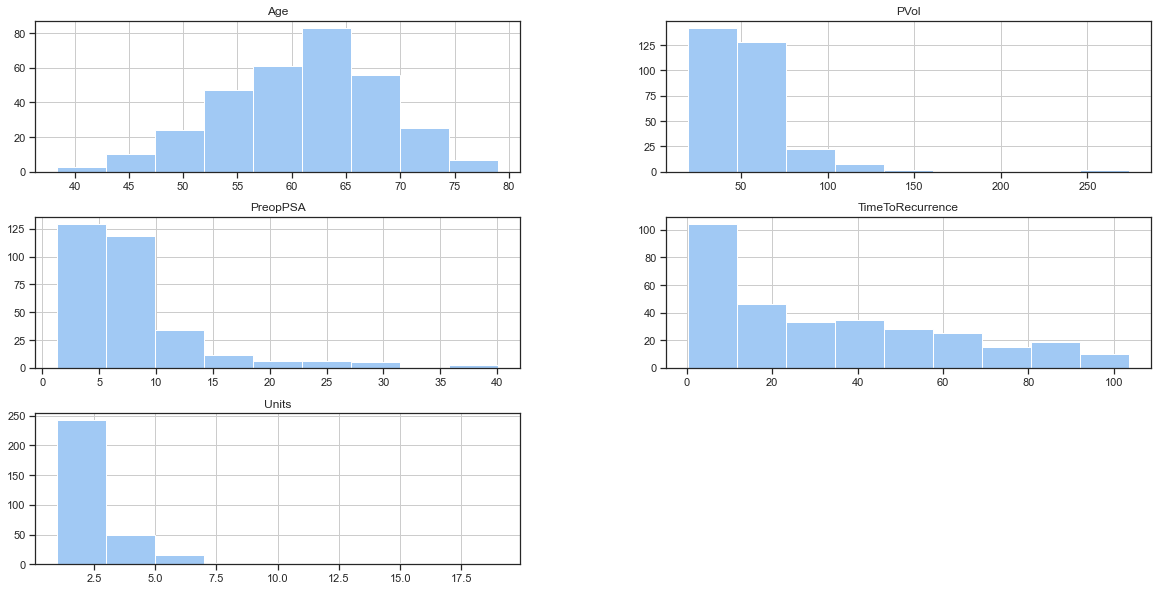

In [27]:
# To analyze data distribution
fix, fig = plt.subplots(figsize=(20,10))
df_nocatg.hist(ax=fig, bins= int(k), grid=True)
plt.show()

### Data Pre-processing

In [4]:
df.head()

,RBC Age Group,Median RBC Age,Age,AA,FamHx,PVol,TVol,T Stage,bGS,BN+,OrganConfined,PreopPSA,PreopTherapy,Units,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor,TimeToRecurrence
0,3,25,72.1,0,0,54.0,3.0,1.0,3.0,0,0,14.08,1,6,1,0,0,1,0,2.67
1,3,25,73.6,0,0,43.2,3.0,2.0,2.0,0,1,10.50,0,2,3,0,0,1,0,47.63
2,3,25,67.5,0,0,102.7,1.0,1.0,3.0,0,1,6.98,1,1,1,0,0,0,1,14.10
3,2,15,65.8,0,0,46.0,1.0,1.0,1.0,0,1,4.40,0,2,3,0,0,0,1,59.47
4,2,15,63.2,0,0,60.0,2.0,1.0,2.0,0,1,21.40,0,3,3,0,0,0,1,1.23


In [8]:
# replacing missing data to column median
df['PVol'].fillna(df['PVol'].median(), inplace=True)
df['PreopPSA'].fillna(df['PreopPSA'].median(), inplace=True)
df['TimeToRecurrence'].fillna(df['TimeToRecurrence'].median(), inplace=True)
# only categorical missing data 
df.isna().sum()

RBC Age Group        0
Median RBC Age       0
Age                  0
AA                   0
FamHx                0
PVol                 0
TVol                 6
T Stage             13
bGS                  2
BN+                  0
OrganConfined        0
PreopPSA             0
PreopTherapy         0
Units                0
sGS                  0
AnyAdjTherapy        0
AdjRadTherapy        0
Recurrence           0
Censor               0
TimeToRecurrence     0
dtype: int64

In [20]:
# drop missing data to categorical data
df = df.dropna()
df.isna().sum()

Age                 0
AA                  0
FamHx               0
PVol                0
TVol                0
T Stage             0
bGS                 0
BN+                 0
OrganConfined       0
PreopPSA            0
PreopTherapy        0
Units               0
sGS                 0
AnyAdjTherapy       0
AdjRadTherapy       0
Recurrence          0
Censor              0
TimeToRecurrence    0
dtype: int64

In [17]:
# drop columns that will not be useful to answer my questions
df = df.drop(["RBC Age Group", "Median RBC Age"], axis = 1)

In [19]:
# checck dataframe
df.head(3)

,Age,AA,FamHx,PVol,TVol,T Stage,bGS,BN+,OrganConfined,PreopPSA,PreopTherapy,Units,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor,TimeToRecurrence
0,72.1,0,0,54.0,3.0,1.0,3.0,0,0,14.08,1,6,1,0,0,1,0,2.67
1,73.6,0,0,43.2,3.0,2.0,2.0,0,1,10.50,0,2,3,0,0,1,0,47.63
2,67.5,0,0,102.7,1.0,1.0,3.0,0,1,6.98,1,1,1,0,0,0,1,14.10


### Centrality and Dispersion Measures

In [35]:
# To use numeric data
df_numeric = df[["Age", "PVol", "PreopPSA", "Units", "TimeToRecurrence"]]

# centrality and dispersion measures
# means and medians
df_means = pd.DataFrame(np.mean(df_numeric, axis = 0), columns= ["means"])
df_medians = pd.Series(np.median(df_numeric, axis=0), name = "medians")

df_means.reset_index(drop=True, inplace = True)
df_c = pd.concat([df_means, df_medians], axis=1)

df_c.rename(index = {0: "Age", 1: "Pvol", 2: "PreopPSA",
               3:"Units", 4:"TimeToReccurence"}, inplace= True)

# dataframe with centrality measures - mean and median
df_c

,means,medians
Age,61.063636,61.90
Pvol,55.759259,49.00
PreopPSA,8.251111,6.20
Units,2.383838,2.00
TimeToReccurence,33.567778,26.77


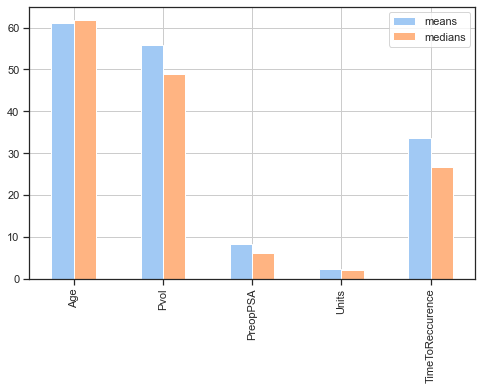

In [45]:
# comparison between means and medians
df_c.plot(kind = 'bar', grid=True, figsize=(8,5))

In [46]:
# mode for categorical data
df_catg = df[["AA", "FamHx", "TVol", "T Stage", "bGS", "BN+", "OrganConfined",
             "PreopTherapy", "sGS", "AnyAdjTherapy", "AdjRadTherapy", "Recurrence", "Censor"]]

df_catg.mode()

,AA,FamHx,TVol,T Stage,bGS,BN+,OrganConfined,PreopTherapy,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor
0,0,0,2.0,1.0,1.0,0,1,0,3,0,0,0,1


In [ ]:
# variance
np.var(df_numeric)

In [ ]:
# standard deviation
df_numeric.std()

In [51]:
df.shape

(297, 18)

### Visualization

Text(0.5, 1.0, 'Any Adjuvant Therapy and Time to Recurrence')

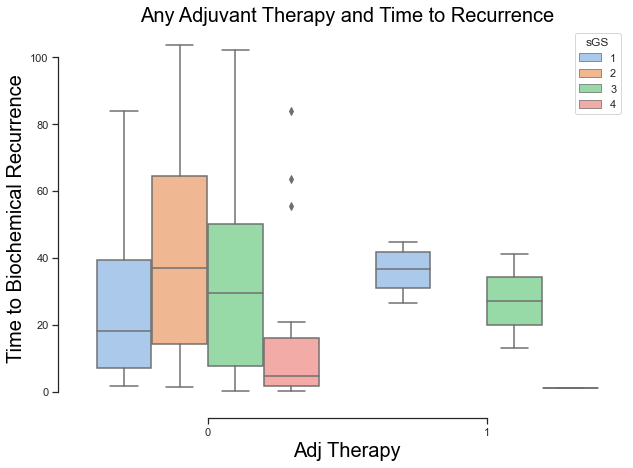

In [47]:
# Draw a nested boxplot to show bills by day and time
plt.figure(figsize=(10,7))
sns.boxplot(x="AnyAdjTherapy", y="TimeToRecurrence",
            hue="sGS", data=df)
sns.despine(offset=10, trim=True)
plt.xlabel('Adj Therapy', c ='black', fontsize=20)
plt.ylabel('Time to Biochemical Recurrence',c='g', color = 'black', fontsize=20)
plt.title('Any Adjuvant Therapy and Time to Recurrence', c='black', fontsize=20)

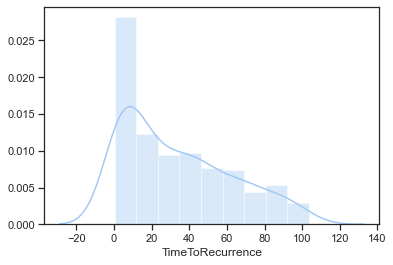

In [52]:
# Sturges for bins number
k = 1 + 3.322 * np.log10(297)


sns.distplot(df["TimeToRecurrence"], bins = int(k))

In [ ]:
sns.scatterplot(data = df, x = "TimeToRecurrence", y = "PreopPSA")

#### Does the size of the tumor influence recurrence?

In [62]:
# Correlation
df['Recurrence'].corr(df['TVol'])

# indicates a weak correlation.

0.3033871543044915

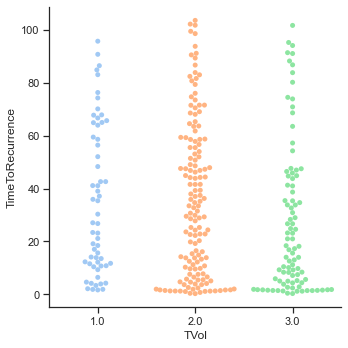

In [69]:
# the distribuition of TVol categories show us 
sns.catplot(x="TVol", y="TimeToRecurrence", kind="swarm", data= df)

### Is any adjuvant therapy effective so that there is no recurrence?

### Is there a recurrence only in patients who had a high Gleason score?